In [1]:
#import necessary packages
import csv

import numpy as np
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [3]:
#First set of usable data - from Logan Schmidt using James Tattersall's sheets
!head one.csv

-13	1	12/01/48	An Esteemed Correspondent	J. Alsop ;Digamma *;Thomas Cranstoun *;John Giblin *;J.M. *	1;	Jan-49;	xx;xx	41;
-12	1	01/01/49	T. Morley	Unknown ;T.J.L. 	1;	Feb-49;Feb-49	xx;xx	9;
-11	1	02/01/49	T.J.L. 	J.W. 	1	03/01/49	xx	41
-10	1	02/01/49	Enquirer	T. Morley 	1	03/01/49	xx	22
-9	1	03/01/49	Thomas Morley	J.W. 	1	04/01/49	xx	22
-8	1	04/01/49	Thomas Morley	UNKNOWN;UNKNOWN	1;1	May-49;Jun-49	xx;xx	41;
-7	1	04/01/49	Collegian	J.W. 	1	05/01/49	xx	22
-6	1	05/01/49	Gomphos					3
-5	1	05/01/49	S.A.G.					74
-4	1	06/01/49	Geometricus	 UNKNOWN	1	07/01/49	xx	47


In [4]:
#first create list using all columns
allData = []
with open('one.csv', 'r') as f:
    filereader = csv.reader(f, delimiter="\t", quotechar='"')
    for row in filereader:
            allData.append(row)
            
#selecting out only 1849 data
fortyNine = []
edge = []
i=0
for x in allData:
    date=x[2].split("/")
    if len(date)==3:
        if date[2]=="49":
            edge.append([x[3],x[4]])
            fortyNine.append(edge[i])
            i=i+1
            
#fix the solver column!
fixedSolver = []
edge = []
i=0
#once sorted for date, we can remove whitespace
#I done like using replace, but couldn't get split to work :( sad - this should be ok for now
#Also need to change all unknowns to be the same (probably, I'll ask Dr. Despeaux about this)
unknown = {"", "Unknown", "unknown"}
for x in fortyNine:
    if ";" in x[1]:
        solvers = x[1].split(";")
        for y in solvers:
            one=x[0].replace(' ', '')
            two=y.replace(' ', '')
            if(one in unknown):
                one="UNKNOWN"
            if(two in unknown):
                two="UNKNOWN"
            fixedSolver.append([one,two])
    else:
        one=x[0].replace(' ', '')
        two=x[1].replace(' ', '')
        if(one in unknown):
            one="UNKNOWN"
        if(two in unknown):
            two="UNKNOWN"
        fixedSolver.append([one,two])
    #i=i+1

In [5]:
fixedSolver

[['T.Morley', 'UNKNOWN'],
 ['T.Morley', 'T.J.L.'],
 ['T.J.L.', 'J.W.'],
 ['Enquirer', 'T.Morley'],
 ['ThomasMorley', 'J.W.'],
 ['ThomasMorley', 'UNKNOWN'],
 ['ThomasMorley', 'UNKNOWN'],
 ['Collegian', 'J.W.'],
 ['Gomphos', 'UNKNOWN'],
 ['S.A.G.', 'UNKNOWN'],
 ['Geometricus', 'UNKNOWN'],
 ['UNKNOWN', 'J.W.'],
 ['Geometricus', 'UNKNOWN'],
 ['J.W.', 'UNKNOWN'],
 ['Geometricus', 'ThomasWilkinson'],
 ['Philo-Mathematicus', 'ThomasWilkinson'],
 ['UNKNOWN', 'UNKNOWN'],
 ['Theta', 'ThomasWilkinson'],
 ['Theta', 'ThomasWilkinson'],
 ['Theta', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['Geometricus', 'ThomasWilkinson'],
 ['UNKNOWN', 'J.S.'],
 ['UNKNOWN', 'ThomasWilkinson*'],
 ['UNKNOWN', 'J.M.[ofBiggleswade]*'],
 ['UNKNOWN', 'J.S.'],
 ['UNKNOWN', 'ThomasWilkinson*'],
 ['UNKNOWN', 'J.M.[ofBiggleswade]*'],
 ['ThomasMorley', 'J.S.'],
 ['ThomasMorley', 'ThomasWilkinson*'],
 ['ThomasMorley', 'J.M.[fromPlymouth]*'],
 ['ThomasWilkinson', 'Tho

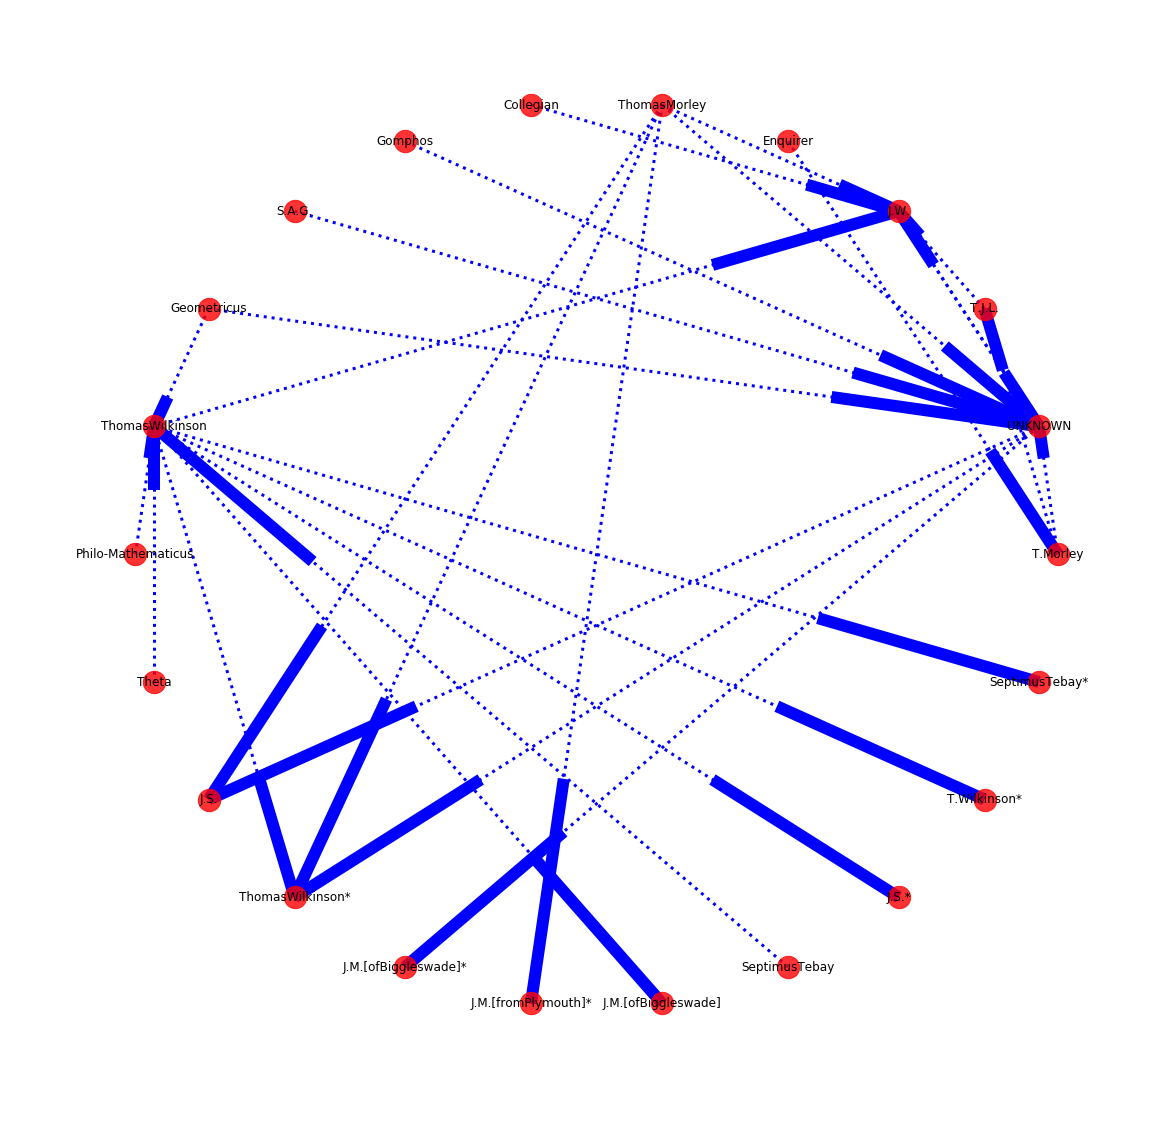

In [6]:
#initial digraph for our proposers and solvers
#thick lines are on the side of the solver
MTd = nx.DiGraph()
MTd.add_edges_from(fixedSolver)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(MTd)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(MTd, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(MTd, pos=layout, width=3, style='dotted',
                       edge_color='blue')
nx.draw_networkx_labels(MTd, pos=layout, font_size=12)

#save automatically in the current directory as a png file
plt.savefig("demonstrationDiGraph.png", format="PNG")

In [7]:
#create graph using networkx
Wd = nx.from_edgelist(fixedSolver)
#information about nodes and links
print(nx.info(Wd))

Name: 
Type: Graph
Number of nodes: 22
Number of edges: 31
Average degree:   2.8182


DEGREE CENTRALITY

In [8]:
#sorted 1849
MT = nx.from_edgelist(fixedSolver)
MTdegrees=list(MT.degree)
MTdegrees.sort(key=lambda x: x[1],reverse=True)
MTdegrees

[('ThomasWilkinson', 12),
 ('UNKNOWN', 11),
 ('J.W.', 5),
 ('ThomasMorley', 5),
 ('Geometricus', 4),
 ('T.Morley', 3),
 ('ThomasWilkinson*', 3),
 ('SeptimusTebay', 3),
 ('T.J.L.', 2),
 ('J.S.', 2),
 ('Enquirer', 1),
 ('Collegian', 1),
 ('Gomphos', 1),
 ('S.A.G.', 1),
 ('Philo-Mathematicus', 1),
 ('Theta', 1),
 ('J.M.[ofBiggleswade]*', 1),
 ('J.M.[fromPlymouth]*', 1),
 ('J.M.[ofBiggleswade]', 1),
 ('J.S.*', 1),
 ('T.Wilkinson*', 1),
 ('SeptimusTebay*', 1)]

T.Morley UNKNOWN 1
T.Morley T.J.L. 1
T.J.L. J.W. 1
Enquirer T.Morley 1
ThomasMorley J.W. 1
ThomasMorley UNKNOWN 2
ThomasMorley UNKNOWN 2
Collegian J.W. 1
Gomphos UNKNOWN 1
S.A.G. UNKNOWN 1
Geometricus UNKNOWN 2
UNKNOWN J.W. 1
Geometricus UNKNOWN 2
J.W. UNKNOWN 1
Geometricus ThomasWilkinson 2
Philo-Mathematicus ThomasWilkinson 1
UNKNOWN UNKNOWN 1
Theta ThomasWilkinson 3
Theta ThomasWilkinson 3
Theta ThomasWilkinson 3
ThomasWilkinson ThomasWilkinson 5
ThomasWilkinson ThomasWilkinson 5
Geometricus ThomasWilkinson 2
UNKNOWN J.S. 2
UNKNOWN ThomasWilkinson* 2
UNKNOWN J.M.[ofBiggleswade]* 2
UNKNOWN J.S. 2
UNKNOWN ThomasWilkinson* 2
UNKNOWN J.M.[ofBiggleswade]* 2
ThomasMorley J.S. 1
ThomasMorley ThomasWilkinson* 1
ThomasMorley J.M.[fromPlymouth]* 1
ThomasWilkinson ThomasWilkinson 5
ThomasWilkinson ThomasWilkinson 5
ThomasWilkinson J.M.[ofBiggleswade] 1
ThomasWilkinson ThomasWilkinson* 1
SeptimusTebay SeptimusTebay 2
Geometricus Geometricus 2
ThomasWilkinson J.W. 1
ThomasWilkinson J.S.* 2
Thoma

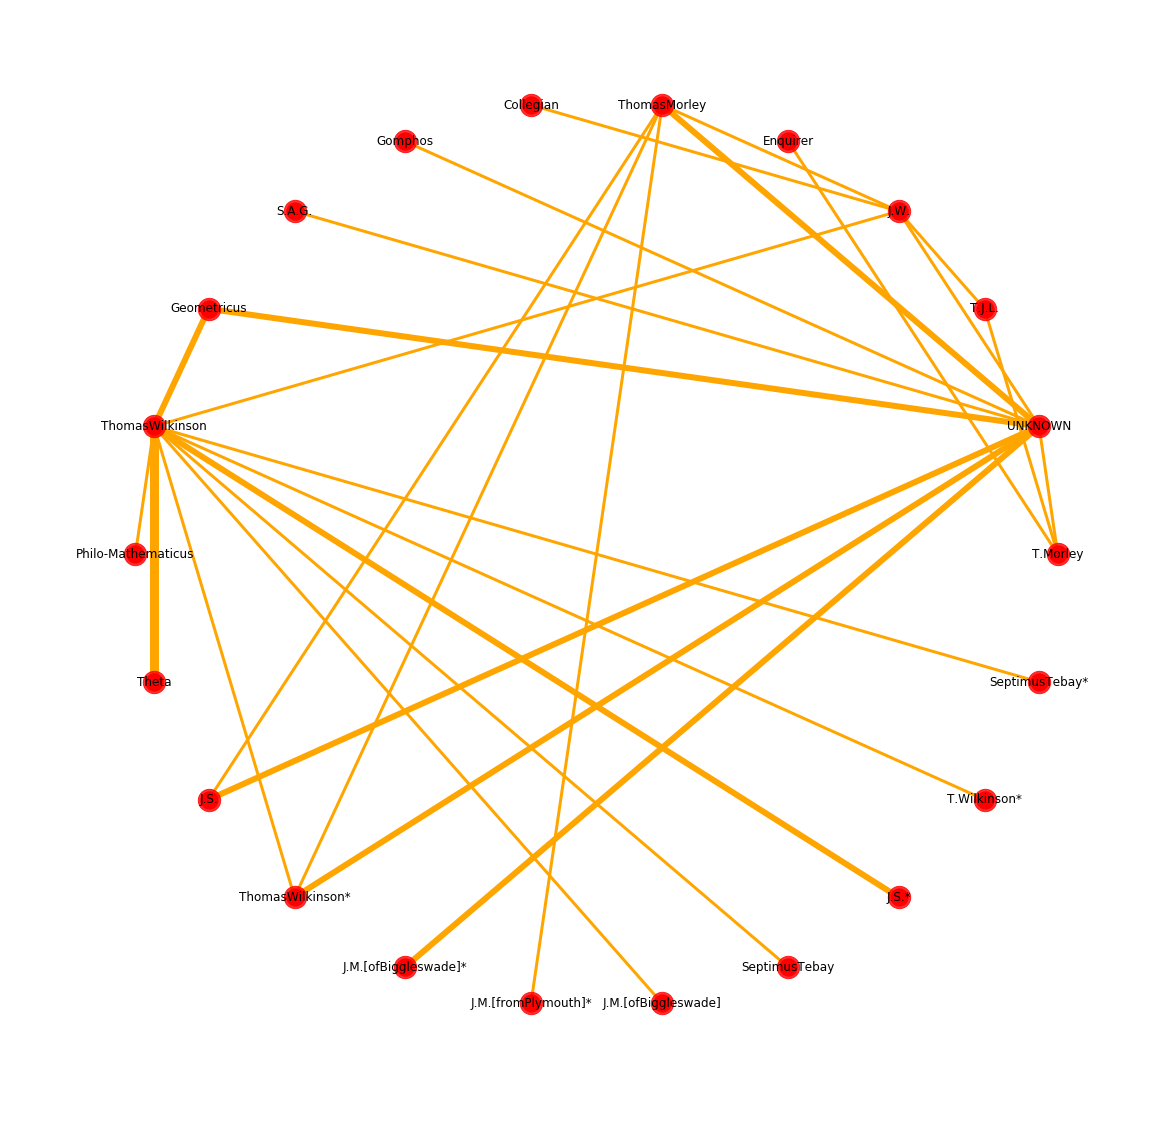

In [9]:
#need a method that takes unique authors and parses list while counting number of times an edge occurs
#between them and the same person, then use that as a weight

#lets try using fixedSolver...
weighted = nx.Graph()
for x in fixedSolver:
    num=0;
    for solver in fixedSolver:
        if (x[1]==solver[1]) and (x[0]==solver[0]):
            num=num+1
    print(x[0],x[1],num)
    num=num*3;
    weighted.add_edge(x[0],x[1], weight=num)

    
#width, length
plt.figure(figsize=(20,20))
plt.axis('off')
    
# generate the layout and place nodes and edges
layout = nx.circular_layout(weighted)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(weighted, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_labels(weighted, pos=layout, font_size=12)

edges = weighted.edges()
#colors = [G[u][v]['color'] for u,v in edges]
weights = [weighted[u][v]['weight'] for u,v in edges]

nx.draw(weighted, pos=layout, edges=edges, width=weights, edge_color='orange')

plt.savefig("week5oneConnections.png", format="PNG")